## 1. Import delle librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerie importate! Siamo pronti a partire.")

Librerie importate! Siamo pronti a partire.


## 2. Caricamento e Analisi Dati

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

y = pd.Series(iris.target, name='species')
print(X.head())
print(f"\nSpecie {iris.target_names}")
print(f"In totale abbiamo {X.shape[0]} fiori e {X.shape[1]} misure per ogni fiore.")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Specie ['setosa' 'versicolor' 'virginica']
In totale abbiamo 150 fiori e 4 misure per ogni fiore.


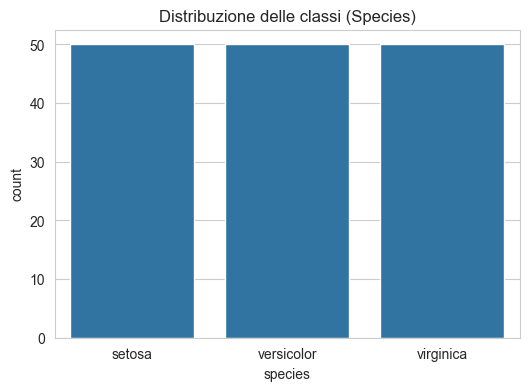

In [3]:
# Distribuzione delle classi
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribuzione delle classi (Species)')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

## 3. Preprocessing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dati divisi e 'puliti' (scalati).")

Dati divisi e 'puliti' (scalati).


## 4. Logistic Regression (Senza ricerca iperparametri)

In [5]:
# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Voto Logistic Regression: {acc_lr:.4f} (Accuracy)")
print("\nPagella dettagliata (Classification Report):")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))

Voto Logistic Regression: 0.9333 (Accuracy)

Pagella dettagliata (Classification Report):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



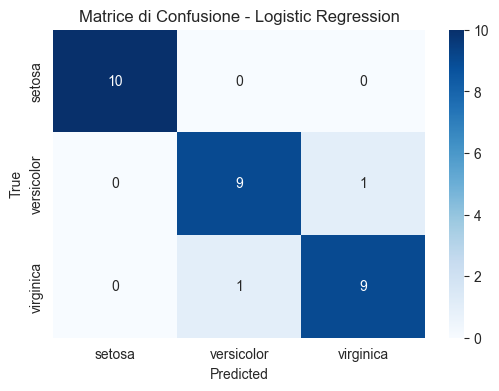

In [6]:
#matrice di confusione
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - Logistic Regression')
plt.show()

## 5. Decision Tree (con Grid Search)

In [7]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5],       
    'min_samples_split': [2, 5, 10],       
    'criterion': ['gini', 'entropy']      
}
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

best_dt = grid_dt.best_params_
print("Best hyper: ", best_dt)

dt = DecisionTreeClassifier(**best_dt)
dt= dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)


Best hyper:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


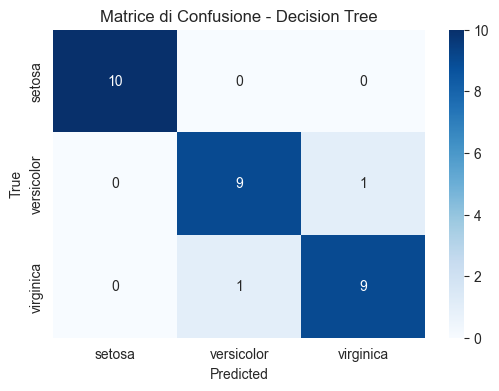

In [8]:
#matrice di confusione
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - Decision Tree')
plt.show()

## 7. Confronto Risultati

                Modello  Accuracy
0   Logistic Regression  0.933333
1  Decision Tree (Grid)  0.933333


/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_23554/757645513.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modello', y='Accuracy', data=results, palette='viridis')


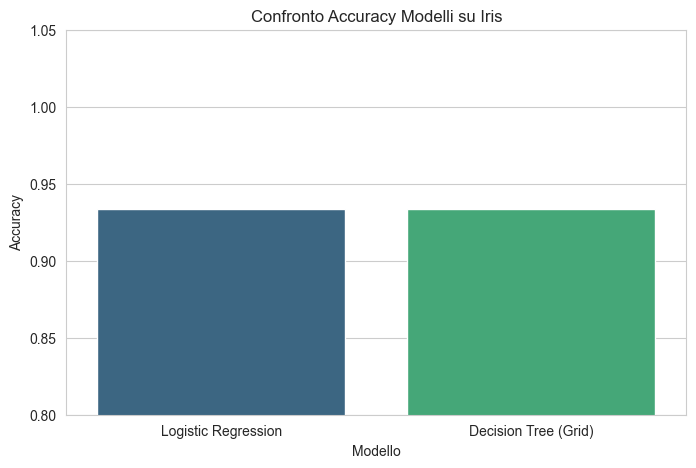

In [10]:
results = pd.DataFrame({
    'Modello': ['Logistic Regression', 'Decision Tree (Grid)'],
    'Accuracy': [acc_lr, acc_dt]
})

print(results)

plt.figure(figsize=(8, 5))
sns.barplot(x='Modello', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.8, 1.05)
plt.title('Confronto Accuracy Modelli su Iris')
plt.show()